## PAN Card Tampering Detection

####  The purpose of this project is to discover the manipulation of a PAN card using computer vision. This project will help a different organization to discover whether the identity card i.e. the PAN card given to them by their employees, customers or any person is a national identity card or not.

#### For this project we will calculate structural similarity of original PAN card and the PAN card uploaded by user.

In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [3]:
# Open image and display
original = Image.open(requests.get('https://egkw.com//Files/ArticlePhotos/24XFOIHLHDAXAYWVZUHDTXAVCP.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://benescope.agenfilm.productions/imgOIP.Fri95MZOpVtsgdcENtUIfgHaE1', stream=True).raw) 

#### Loading original and user provided images.

In [4]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (713, 441)
Tampered image size :  (474, 309)


#### Converting the format of  tampered image similar to original image.

In [5]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


####  Here, we checked the format and size of the original and tampered image.

In [6]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

#### Converting the size of tampered and original image.

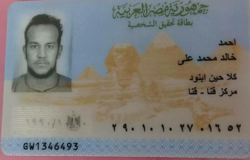

In [7]:
# Display original image
original

#### Orginial PAN card image used for comparision.

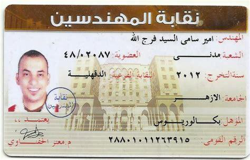

In [8]:
# Display user given image
tampered

#### User provided image which will be compared with PAN card.

In [9]:
# load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

#### Reading images using opencv.

In [10]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [11]:
original_gray

array([[144, 144, 145, ..., 132, 134, 136],
       [143, 144, 145, ..., 132, 134, 139],
       [144, 144, 146, ..., 133, 134, 142],
       ...,
       [142, 142, 140, ..., 117, 111, 111],
       [142, 141, 140, ..., 106, 105, 110],
       [142, 141, 140, ..., 108, 108, 111]], dtype=uint8)

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [12]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score*100))
if (score*100 >= 36.0) :
  print("This is national  ID card ")
else : 
  print("This is NOT national  ID card")

SSIM: 18.636616460458463
This is NOT national  ID card


#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [13]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [14]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


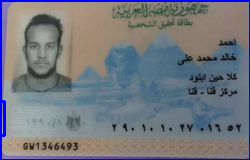

In [15]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


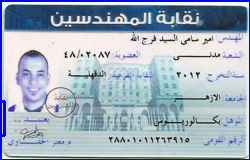

In [16]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


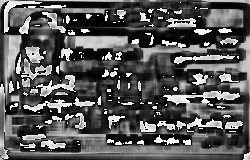

In [17]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


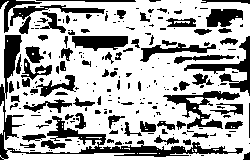

In [18]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

### Summary 

####Discovering the structural similarities of the images helped us find the difference or similarity in the appearance of the images. Similarly, the detection of threshold and landmarks based on that threshold of images converted to binary grayscale also helped us to analyze and identify shapes.
####Since our SSIM is about 18.6% we can say that the photo provided by the user is not a national ID or has been tampered with.
####Finally, we visualized the differences and similarities between the images using image presentation with features, difference, and threshold.

### Scope

#### This project can be used in different organizations where customers or users need to provide one type of identity in order to verify themselves. The institution can use this project to find out whether the ID is the national card or not. Similarly, this can be used for any type of ID like adhar, voter ID, etc.